# 4 - Network architectures - Autoencoders

In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

In [2]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.0.0'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


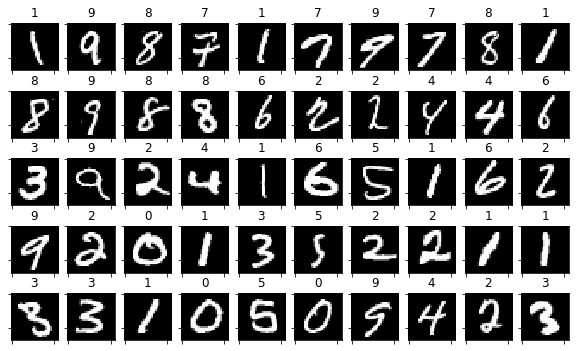

In [3]:
perm = np.random.permutation(list(range(X.shape[0])))[0:50]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

## 1. Autoencoders

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [5]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.backend import clear_session
import tensorflow as tf

In [6]:
def get_model(input_dim, code_size):

    inputs = Input(shape=input_dim)
    encoder = Dense(code_size, activation='relu')(inputs)
    avg_latent_activations = tf.reduce_mean(encoder, axis=0)
    outputs = Dense(input_dim, activation='sigmoid')(encoder)

    model = Model([inputs], [outputs])
    model.compile(optimizer='adam', loss='mse')
    return model, encoder, avg_latent_activations

porqué sigmoide en la última capa. qué pasaría si ponemos tanh o linear

In [7]:
model, encoder, avg_latent_activations = get_model(input_dim=X.shape[1], code_size=50)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               39984     
Total params: 79,234
Trainable params: 79,234
Non-trainable params: 0
_________________________________________________________________


try with larger layer, try with more layers

In [8]:
model.fit(X_train, X_train, epochs=100, batch_size=16)

Train on 1200 samples
Epoch 1/100
1200/1200 [==============================] - 0s 220us/sample - loss: 0.1031
Epoch 2/100
1200/1200 [==============================] - 0s 96us/sample - loss: 0.0602
Epoch 3/100
1200/1200 [==============================] - 0s 96us/sample - loss: 0.0492
Epoch 4/100
1200/1200 [==============================] - 0s 66us/sample - loss: 0.0431
Epoch 5/100
1200/1200 [==============================] - 0s 65us/sample - loss: 0.0386
Epoch 6/100
1200/1200 [==============================] - 0s 68us/sample - loss: 0.0349
Epoch 7/100
1200/1200 [==============================] - 0s 63us/sample - loss: 0.0317
Epoch 8/100
1200/1200 [==============================] - 0s 67us/sample - loss: 0.0291
Epoch 9/100
1200/1200 [==============================] - 0s 70us/sample - loss: 0.0269
Epoch 10/100
1200/1200 [==============================] - 0s 74us/sample - loss: 0.0250
Epoch 11/100
1200/1200 [==============================] - 0s 73us/sample - loss: 0.0234
Epoch 12/100
1200/

Epoch 94/100
1200/1200 [==============================] - 0s 62us/sample - loss: 0.0045
Epoch 95/100
1200/1200 [==============================] - 0s 74us/sample - loss: 0.0044
Epoch 96/100
1200/1200 [==============================] - 0s 63us/sample - loss: 0.0044
Epoch 97/100
1200/1200 [==============================] - 0s 59us/sample - loss: 0.0044
Epoch 98/100
1200/1200 [==============================] - 0s 61us/sample - loss: 0.0044
Epoch 99/100
1200/1200 [==============================] - 0s 60us/sample - loss: 0.0043
Epoch 100/100
1200/1200 [==============================] - 0s 59us/sample - loss: 0.0043


observe the average activation of each latent neuron for all train data

In [9]:
from tensorflow.keras import backend as K
fl = K.function([model.input], [avg_latent_activations])
fl(X_train)

[array([ 7.821822 ,  7.236865 ,  6.947421 ,  5.5829062,  9.733132 ,
         5.3420925,  5.6889577,  4.6146173,  5.6246243,  2.756387 ,
         5.263189 ,  5.7526317,  3.3460698,  6.508909 ,  5.6402445,
         5.226904 ,  5.562851 ,  5.232005 ,  6.6963797,  5.827833 ,
         5.4785905,  5.1644454,  3.891168 ,  5.441585 ,  4.9872856,
         5.5402126,  6.745936 ,  4.788079 ,  3.8945162,  5.1530633,
         7.1550336,  6.552982 ,  7.3555093,  6.0033793,  6.0774965,
         6.000663 ,  6.185482 ,  5.227069 ,  6.505696 ,  6.821496 ,
         5.205787 ,  5.802242 ,  5.285625 , 11.446103 ,  8.927542 ,
         8.3400545,  5.401397 ,  5.1066194,  7.4206576,  4.431855 ],
       dtype=float32)]

### show reconstruction on sampled test images

In [10]:
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)

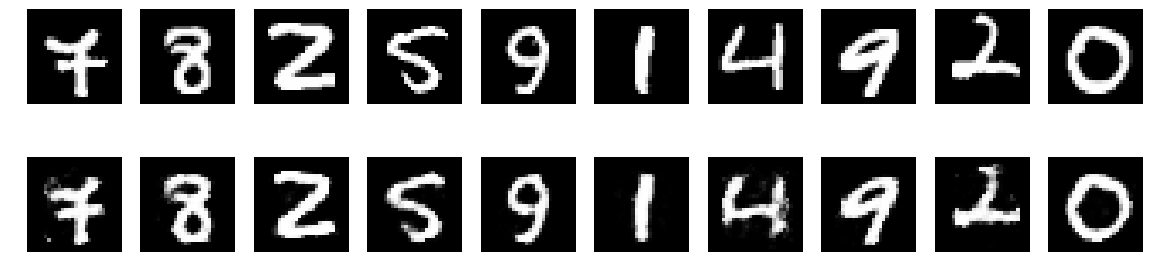

In [11]:
plt.figure(figsize=(20,5))
for i in range(len(X_sample)):
    plt.subplot(2,len(X_sample),i+1)
    plt.imshow(X_sample[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample),len(X_sample)+i+1)
    plt.imshow(X_pred[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

### show weights

In [12]:
w = model.get_weights()
w[0].shape

(784, 50)

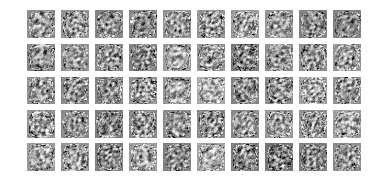

In [13]:
plt.figure(figsize=(6,6))
for k,i in enumerate(np.random.permutation(w[0].shape[1])[:100]):
    plt.subplot(10,10,k+1)
    plt.imshow(w[0][:,i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

### see data in latent space

encoded data size (200, 50)
mean activation at encoder 6.047


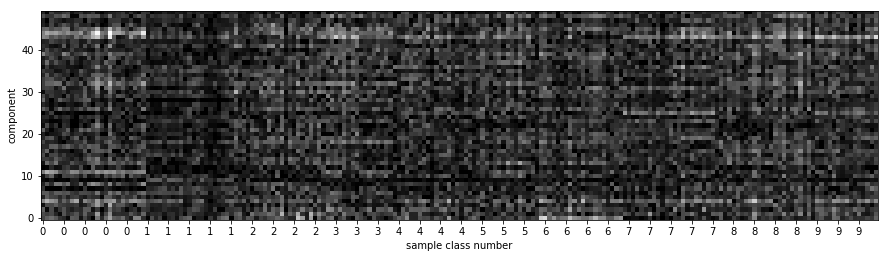

In [14]:
idxs = np.random.permutation(len(X_test))[:200]
idxs = idxs[np.argsort(y_test[idxs])]
y_sample = y_test[idxs]
X_sample = X_test[idxs]

import tensorflow.keras.backend as K
l0_output = K.function([model.input], [encoder])
X_sample_encoded = l0_output([X_sample])[0]
print("encoded data size", X_sample_encoded.shape)
plt.figure(figsize=(15,10))
plt.imshow(X_sample_encoded.T, cmap=plt.cm.Greys_r, origin="bottom")
plt.ylabel("component")
plt.xlabel("sample class number")
plt.xticks(range(len(y_sample))[::5], y_sample[::5]);
print ("mean activation at encoder %.3f"%np.mean(X_sample_encoded))

### observe distribution of activations

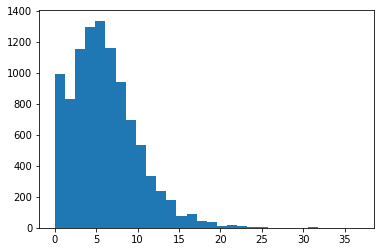

In [15]:
plt.hist(X_sample_encoded.flatten(), bins=30);

### avg representative of each class in latent space, reconstructed

for each class:
- take all train samples
- obtain their representation in latent space
- average all latent space representations
- propage the averaged vector through the decoder

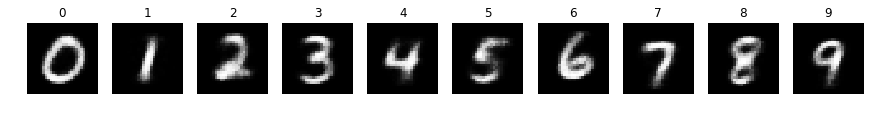

In [16]:
X_train_encoded = l0_output([X_train])[0]

fdecode = K.function([encoder], [model.outputs])
plt.figure(figsize=(15,3))
for k, i in enumerate(np.unique(y_train)):
    plt.subplot(1,10,k+1)
    plt.imshow(fdecode(X_train_encoded[y_train==i].mean(axis=0).reshape(1,-1))[0][0][0].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off"); plt.title("%d"%i);
        

### most representative neuron in latent space for each class

for each class:
- take all train samples
- obtain their representation in latent space
- average all latent space representations
- build a one hot vector in latent space with the activated neuron in average
- propage the averaged vector through the decoder

class 0, most avg activated neuron is 44, with value 16.96
class 1, most avg activated neuron is 43, with value 9.20
class 2, most avg activated neuron is 44, with value 11.49
class 3, most avg activated neuron is 43, with value 14.78
class 4, most avg activated neuron is 43, with value 12.14
class 5, most avg activated neuron is 43, with value 11.80
class 6, most avg activated neuron is 0, with value 16.54
class 7, most avg activated neuron is 43, with value 13.64
class 8, most avg activated neuron is 43, with value 15.46
class 9, most avg activated neuron is 43, with value 15.58


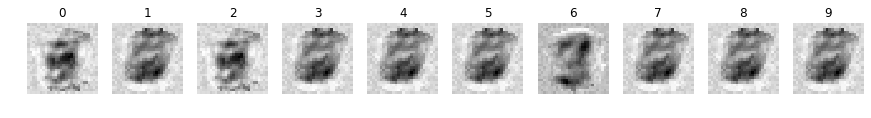

In [17]:
X_train_encoded = l0_output([X_train])[0]
plt.figure(figsize=(15,3))
for k, i in enumerate(np.unique(y_train)):
    plt.subplot(1,10,k+1)
    k = np.zeros(50)
    most_activated_neuron = np.argmax(X_train_encoded[y_train==i].mean(axis=0))
    k[np.argmax(X_train_encoded[y_train==i].mean(axis=0))] = 1
    print ("class %d, most avg activated neuron is %d, with value %.2f"%(i, most_activated_neuron, np.max(X_train_encoded[y_train==i].mean(axis=0))))
    plt.imshow(fdecode(k.reshape(1,-1))[0][0][0].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off"); plt.title("%d"%i);


## 2. Custom loss, unsupervised `.fit(X)` call

given:

- $\mathbf{x}^{(i)} \in \mathbb{R}^{784}$
- $e(\mathbf{x}^{(i)}) \in \mathbb{R}^{50}$, the encoder
- $d(e(\mathbf{x}^{(i)})) \in \mathbb{R}^{784}$, the decoder

we define the loss function as (MSE):

$$\text{loss}(\mathbf{x}^{(i)}) = \frac{1}{m}\sum_m \big(\mathbf{x}^{(i)} - d(e(\mathbf{x}^{(i)}))\big)^2$$

and implement it by hand

In [18]:
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse
import tensorflow as tf

def get_model_U(input_dim, code_size):
    inputs = Input(shape=input_dim)
    encoder = Dense(code_size, activation='relu')(inputs)
    outputs = Dense(input_dim, activation='sigmoid')(encoder)

    loss = tf.reduce_mean( (inputs-outputs)**2)
    model = Model([inputs], [outputs])    
    model.add_loss(loss)
    
    model.compile(optimizer='adam')
    return model, encoder

In [19]:
model, encoder = get_model_U(input_dim=X.shape[1], code_size=40)
model.summary()

W0220 14:29:26.162351 4663383488 training_utils.py:1444] Output dense_3 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_3.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 40)           31400       input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 784)          32144       dense_2[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_sub (TensorFlowOpLa [(None, 784)]        0           input_2[0][0]                    
                                                                 dense_3[0][0]              

observe `.fit` call is unsupervised

In [20]:
model.fit(X_train, epochs=100, batch_size=32)

Train on 1200 samples
Epoch 1/100
1200/1200 [==============================] - 0s 167us/sample - loss: 0.1481
Epoch 2/100
1200/1200 [==============================] - 0s 41us/sample - loss: 0.0705
Epoch 3/100
1200/1200 [==============================] - 0s 37us/sample - loss: 0.0632
Epoch 4/100
1200/1200 [==============================] - 0s 41us/sample - loss: 0.0562
Epoch 5/100
1200/1200 [==============================] - 0s 40us/sample - loss: 0.0507
Epoch 6/100
1200/1200 [==============================] - 0s 46us/sample - loss: 0.0467
Epoch 7/100
1200/1200 [==============================] - 0s 42us/sample - loss: 0.0434
Epoch 8/100
1200/1200 [==============================] - 0s 42us/sample - loss: 0.0406
Epoch 9/100
1200/1200 [==============================] - 0s 42us/sample - loss: 0.0381
Epoch 10/100
1200/1200 [==============================] - 0s 39us/sample - loss: 0.0361
Epoch 11/100
1200/1200 [==============================] - 0s 42us/sample - loss: 0.0344
Epoch 12/100
1200/

Epoch 94/100
1200/1200 [==============================] - 0s 43us/sample - loss: 0.0075
Epoch 95/100
1200/1200 [==============================] - 0s 39us/sample - loss: 0.0075
Epoch 96/100
1200/1200 [==============================] - 0s 37us/sample - loss: 0.0074
Epoch 97/100
1200/1200 [==============================] - 0s 46us/sample - loss: 0.0074
Epoch 98/100
1200/1200 [==============================] - 0s 47us/sample - loss: 0.0073
Epoch 99/100
1200/1200 [==============================] - 0s 45us/sample - loss: 0.0073
Epoch 100/100
1200/1200 [==============================] - 0s 46us/sample - loss: 0.0073


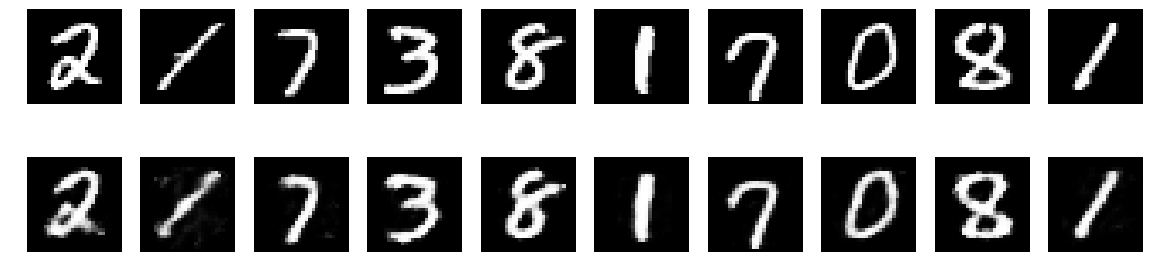

In [21]:
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)

plt.figure(figsize=(20,5))
for i in range(len(X_sample)):
    plt.subplot(2,len(X_sample),i+1)
    plt.imshow(X_sample[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample),len(X_sample)+i+1)
    plt.imshow(X_pred[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

## 3. Autoencoder for image denoising

observe reconstruction when fed with noisy data


In [22]:
def add_noise(x, noise_level=.2):
    return x + np.random.normal(size=x.shape)*noise_level

In [23]:
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)
X_sample_noisy = add_noise(X_sample)
X_pred_noisy   = model.predict(X_sample_noisy)

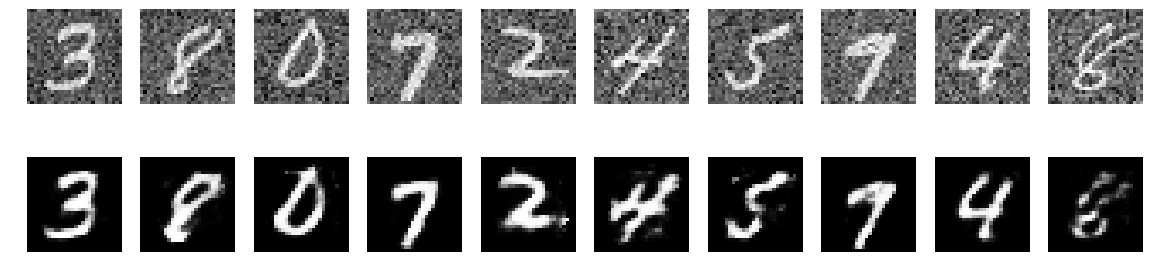

In [24]:
plt.figure(figsize=(20,5))
for i in range(len(X_sample_noisy)):
    plt.subplot(2,len(X_sample_noisy),i+1)
    plt.imshow(X_sample_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample_noisy),len(X_sample_noisy)+i+1)
    plt.imshow(X_pred_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

### in a more real scenario we only have noisy data to train the model


In [26]:
n_model, n_encoder,_ = get_model(input_dim=X.shape[1], code_size=40)
X_train_noisy = add_noise(X_train)

n_model.fit(X_train_noisy, X_train_noisy, epochs=100, batch_size=32)

Train on 1200 samples
Epoch 1/100
1200/1200 [==============================] - 0s 170us/sample - loss: 0.1832
Epoch 2/100
1200/1200 [==============================] - 0s 39us/sample - loss: 0.1103
Epoch 3/100
1200/1200 [==============================] - 0s 39us/sample - loss: 0.1040
Epoch 4/100
1200/1200 [==============================] - 0s 43us/sample - loss: 0.0974
Epoch 5/100
1200/1200 [==============================] - 0s 41us/sample - loss: 0.0918
Epoch 6/100
1200/1200 [==============================] - 0s 42us/sample - loss: 0.0872
Epoch 7/100
1200/1200 [==============================] - 0s 41us/sample - loss: 0.0835
Epoch 8/100
1200/1200 [==============================] - 0s 42us/sample - loss: 0.0807
Epoch 9/100
1200/1200 [==============================] - 0s 40us/sample - loss: 0.0785
Epoch 10/100
1200/1200 [==============================] - 0s 42us/sample - loss: 0.0766
Epoch 11/100
1200/1200 [==============================] - 0s 42us/sample - loss: 0.0748
Epoch 12/100
1200/

Epoch 94/100
1200/1200 [==============================] - 0s 40us/sample - loss: 0.0451
Epoch 95/100
1200/1200 [==============================] - 0s 40us/sample - loss: 0.0450
Epoch 96/100
1200/1200 [==============================] - 0s 36us/sample - loss: 0.0449
Epoch 97/100
1200/1200 [==============================] - 0s 41us/sample - loss: 0.0449
Epoch 98/100
1200/1200 [==============================] - 0s 39us/sample - loss: 0.0449
Epoch 99/100
1200/1200 [==============================] - 0s 36us/sample - loss: 0.0448
Epoch 100/100
1200/1200 [==============================] - 0s 40us/sample - loss: 0.0448


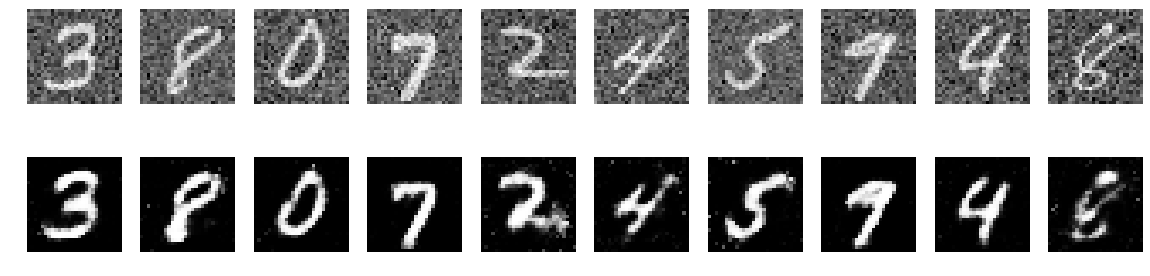

In [27]:
X_sample_noisy = add_noise(X_sample)
X_pred_noisy   = n_model.predict(X_sample_noisy)

plt.figure(figsize=(20,5))
for i in range(len(X_sample_noisy)):
    plt.subplot(2,len(X_sample_noisy),i+1)
    plt.imshow(X_sample_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample_noisy),len(X_sample_noisy)+i+1)
    plt.imshow(X_pred_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")